# МСПС ДЗ 1
## Куприянов Артем АД 599 группа

In [186]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize

%matplotlib inline

## Задача 1

** Решение: **

1)Плотность равномерного распределения на отрезке $[-\theta, \theta]$ есть $p(x) = \frac{1}{2\theta} I(x \in [-\theta, \theta])$

Тогда функция правдоподобия:

$$f_{\theta}(X_1, \dots, X_n) = \frac{1}{2^n\theta^n}\prod\limits_{i = 1}^{n} I(X_i \in [-\theta, \theta])$$

По ММП:

$$\widehat{\theta} = arg \max_{\theta \in \Theta} f_{\theta}(X_1, \dots, X_n)$$

Понятно, что при $\theta \in (X_{(1)}, X_{(n)}) \ \ \ f_{\theta}(X_1, \dots, X_n) = 0$. При $\theta >= \max(X_{(1)}, X_{(n)})$ функция $f_{\theta}(X_1, \dots, X_n)$ положительна и монотонно убывает по $\theta$  (очевидно). Следовательно, максимум функции правдоподобия достигается при $\widehat{\theta} = \max(X_{(1)}, X_{(n)})$.

2)Проверка на состоятельность

Если $\widehat{\theta}$ -- состоятельная оценка параметра $\theta$, то, по определению, $\forall \theta \in \Theta \ \ \forall \varepsilon > 0 \ \ \ P\left(\left|\theta - \widehat{\theta}\right| > \varepsilon\right) \to 0$

Так как распределение симметричное и в силу выведенного выше $\left|X_{(1)}\right| \stackrel{d}{=} \left|X_{(n)}\right| \stackrel{d}{=} \widehat{\theta}$, тогда:

$$P\left(\left|\widehat{\theta} - \theta\right| > \varepsilon\right) = P\left(\left|\left|X_{(n)}\right| - \theta\right| > \varepsilon\right) = P\left(\left|X_{(n)} - \theta\right| > \varepsilon \ | \ X_{(n)} > 0\right)P\left(X_{(n)} > 0\right) + P\left(\left|- X_{(n)} - \theta\right| > \varepsilon \ | \ X_{(n)} <= 0\right)P\left(X_{(n)} <= 0\right) = *$$

Теперь:

$$\begin{cases}
P\left(X_{(n)} < 0\right) = P\left(X_1 < 0, \dots, X_n < 0\right) \stackrel{\text{независ.}}{=}{} \prod\limits_{i = 1}^{n} P(X_i < 0) = \left(\frac{\theta}{2\theta}\right)^{n} \to 0 \ \ \text{при} \ \ n \to \infty \\
P\left(\left|\left|X_{(n)}\right| - \theta\right| > \varepsilon \ | \ X_{(n)} > 0\right) = P\left(\theta - X_{(n)} > \varepsilon \ | \ X_{(n)} > 0\right) = P\left(\theta - \varepsilon > X_{(n)} \ | \ X_{(n)} > 0\right) \stackrel{\text{независ.}}{=}{} \prod\limits_{i = 1}^{n} P\left(\theta - \varepsilon > X_i \ | \ X_{(n)} > 0 \right) < \left(\frac{\theta - \varepsilon}{2\theta}\right)^n \to 0 \ \ \text{при} \ \ n \to \infty \\
\end{cases}
$$

Отсюда получаем:


$$* \leq o(1) + o(1) \to \infty \ \text{при} \ \ n \to \infty$$

И значит, что оценка $\widehat{\theta}$, полученная по методу ОМП, является состоятельной оценкой параметра $\theta$

**Ч.Т.Д.**

## Задача 2

## Задача 3

В задаче беру $Beta(36, 14)$

Анализ сходимости статистики $T_n$

In [115]:
def calc_stat_Tn(sample, expect, variance):
    return (np.cumsum(sample, axis=1) - np.arange(1, len(sample[0]) + 1) * expect) / \
            np.sqrt(np.arange(1, len(sample[0]) + 1) * variance)

In [116]:
sample_size = 10000
beta_distr = sps.beta(a=36, b=14)
sample = beta_distr.rvs(size=(1, sample_size))
sample[:4]

array([[ 0.60929309,  0.73142485,  0.73608311, ...,  0.81281008,
         0.74625134,  0.70910048]])

In [117]:
n = np.arange(1, len(sample[0]) + 1)
T_n = calc_stat_Tn(sample, beta_distr.mean(), beta_distr.var())

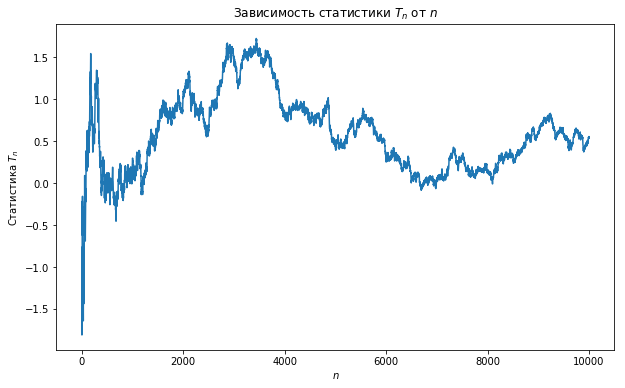

In [118]:
plt.figure(figsize=(10, 6))
plt.plot(n, T_n.ravel())
plt.xlabel('$n$')
plt.ylabel('Статистика $T_n$')
plt.title('Зависимость статистики $T_n$ от $n$')
plt.show()

Теперь сгенерируем 1000 выборок из того же распределения и посчитаем статистики $T_n$ на них:

In [119]:
n_samples = 1000
samples = beta_distr.rvs(size=(n_samples, sample_size))
T_n_array = calc_stat_Tn(samples, beta_distr.mean(), beta_distr.var())

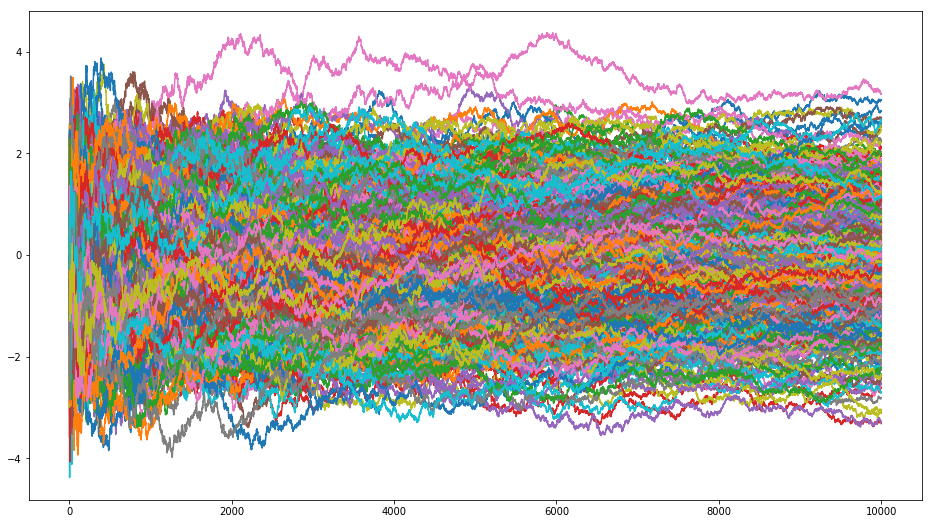

CPU times: user 14.5 s, sys: 219 ms, total: 14.7 s
Wall time: 14.7 s


In [123]:
%%time
plt.figure(figsize=(16, 9))
for T_n in T_n_array:
    plt.plot(n, T_n)
plt.show()

На самом деле, после такого графика ничего не понятно :)

Посмотрим, на распределение последних значений в массивах $T_n$, а также возьмем среднее по 10 последним значениям и тоже посмотрим на распределение:

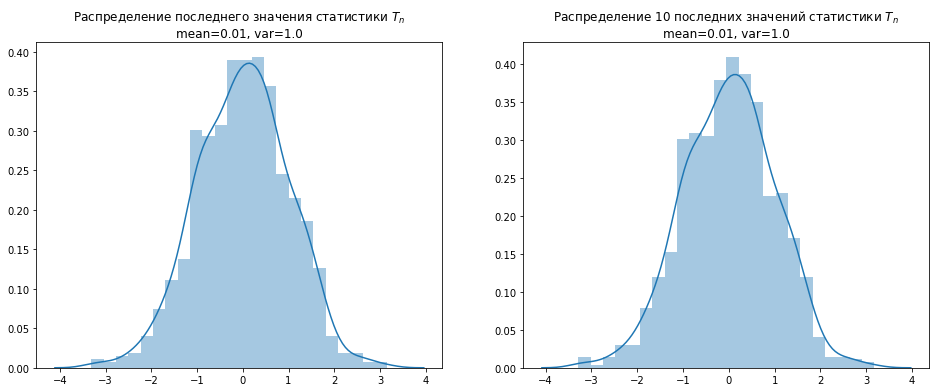

In [134]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.distplot(T_n_array[:, -1])
plt.title('Распределение последнего значения статистики $T_n$'
          '\nmean={}, var={}'.format(round(np.mean(T_n_array[:, -1]), 2), 
                                     round(np.var(T_n_array[:, -1]), 2)))
plt.subplot(1, 2, 2)
sns.distplot(np.mean(T_n_array[:, -10:], axis=1))
plt.title('Распределение 10 последних значений статистики $T_n$'
          '\nmean={}, var={}'.format(round(np.mean(T_n_array[:, -10:]), 2), 
                                     round(np.var(T_n_array[:, -10:]), 2)))
plt.show()

Теперь уже из этих графиков видно, что при больших $n$ величина $T_n$ ведет себя как величина, распределенная стандартно равномерно. 

Проверка выполнимости ЦПТ:

In [71]:
def clt_stat(samples, expect, variance):
    return (np.sum(samples, axis=1) - expect * len(samples[0])) / ( np.sqrt(len(samples[0]) * variance))

In [72]:
sample_size = 1000
n_samples = 1000
samples = beta_distr.rvs(size=(n_samples, sample_size))
clt_sample = clt_stat(samples, beta_distr.mean(), beta_distr.var()) 

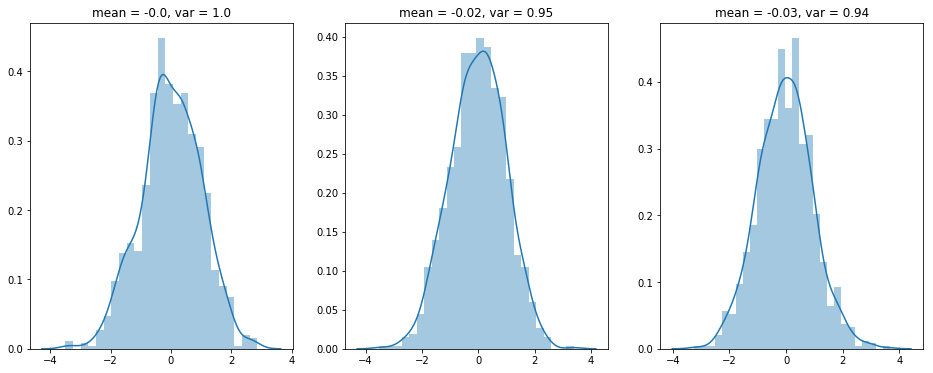

In [74]:
plt.figure(figsize=(16, 6))
for i, size in enumerate([100, 1000, 10000]):
    plt.subplot(1, 3, i + 1)
    n_samples = 1000
    samples = beta_distr.rvs(size=(n_samples, size))
    clt_sample = clt_stat(samples, beta_distr.mean(), beta_distr.var()) 
    sns.distplot(clt_sample, norm_hist=True)
    plt.title('mean = {}, var = {}'.format(round(np.mean(clt_sample), 2), 
                                           round(np.var(clt_sample), 2)))
plt.show()

Действительно, видим, что ЦПТ выполняется

## Задача 4

Выведем формулу для доверительного интервала параметра $\alpha$ уровня доверия $\gamma$:

Функция правдоподобия для распределения Парето:

$$f_\theta(X_1, \dots, X_n) = \frac{\theta^n}{\prod X_{i}^{\theta + 1}} \prod\limits_{i = 1}^{n} I\left(X_i > 0 \right)$$

Ее логарифм:

$$L_\theta(X_1, \dots, X_n) = n \ln \theta + \sum\limits_{i = 1}^{n} \ln I\left(X_i > 0 \right) - (\theta + 1) \sum\limits_{i = 1}^{n} \ln X_i$$

Продифференцируем логарифм правдоподобия и приравняем к нулю:

$$\frac{n}{\theta} - \sum\limits_{i = 1}^{n} \ln X_i = 0 \ \ \ \Rightarrow \ \ \ \widehat{\theta} = \frac{1}{\overline{\ln X}}$$

Оценка, полученная по такому способу, является асимптотически нормальной оценкой (по свойствам ОМП)

Тогда, асимптотический доверительный интервал для параметра $\alpha$ с уровнем доверия $\gamma$ есть:

$$(\widehat{\theta} - u_{1 - \frac{\gamma}{2}}\frac{\sigma(\widehat{\theta})}{\sqrt{n}}, \widehat{\theta} + u_{1 - \frac{\gamma}{2}}\frac{\sigma(\widehat{\theta})}{\sqrt{n}})$$
где $u_{1 - \frac{\gamma}{2}}$ -- $\left(1 - \frac{\alpha}{2}\right)$ -квантиль $N(0, 1)$

In [309]:
def ci(sample, gamma, var):
    opt_theta = 1 / np.mean(np.log(sample))
    diff = sps.norm.ppf(1 - gamma / 2) * np.std(sample) / np.sqrt(len(sample))
    return opt_theta, opt_theta - diff, opt_theta + diff

In [310]:
sample_size = 100
opt_thetas, l_cis, r_cis = [], [], []
alphas = np.linspace(0.1, 5, 100, endpoint=False)
for alpha in alphas:
    sample = sps.pareto(b=alpha).rvs(size=sample_size)
    opt_theta, l_ci, r_ci = ci(sample, 0.05, sps.pareto(b=alpha).var())
    opt_thetas.append(opt_theta), l_cis.append(l_ci), r_cis.append(r_ci)

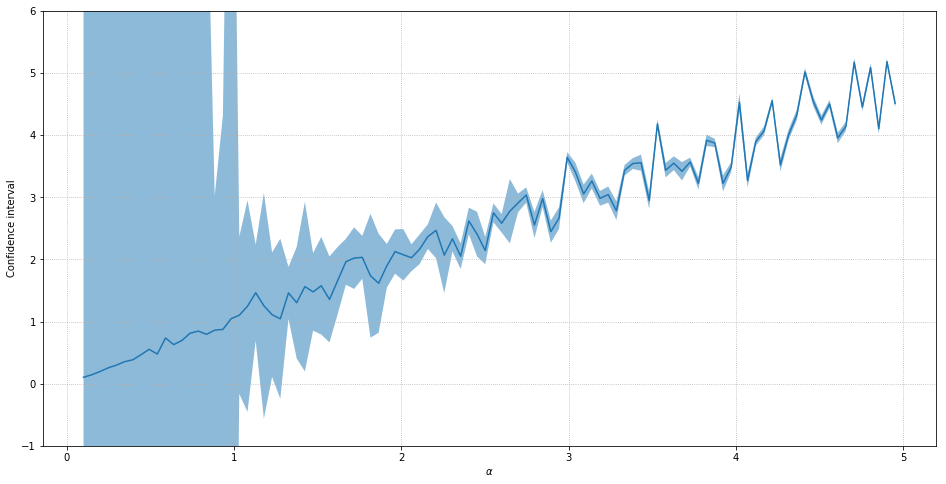

In [318]:
plt.figure(figsize=(16, 8))
plt.plot(alphas, opt_thetas)
plt.fill_between(alphas, l_cis, r_cis, alpha=0.5)
plt.ylim(-1, 6)
plt.grid(ls=':')
plt.xlabel('$\\alpha$')
plt.ylabel('Confidence interval')
plt.show()

Такой огромный доверительный интервал при $\alpha \leq 1$ обусловлен тем, что у распределения Парето нет матожидания при таких $\alpha$
($\int^{\infty} \frac{1}{x^{\alpha}} \ \text{при} \ \alpha \in (0, 1)$ расходится)

## Задача 5

Сгенерируем выборку из распределения, заданного в условии. Для этого создадим класс этого распределения:

In [319]:
class Weibull(sps.rv_continuous):
    def _cdf(self, x, a, b):
        x = np.array(x)
        cdf = np.zeros_like(x)
        cdf[x > 0] = 1 - np.exp(-(b * x) ** a)
        return cdf

In [320]:
weib = Weibull()

In [321]:
sample = weib.rvs(size=100, a=2, b=7)

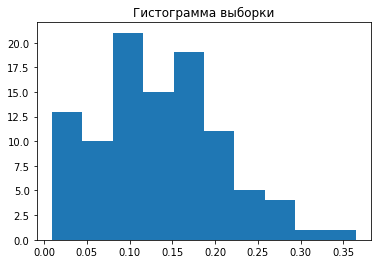

In [322]:
plt.hist(sample)
plt.title('Гистограмма выборки')
plt.show()

In [225]:
def spacing(sample, boudaries = None):
    upd_sample = np.array([-np.inf] + list(sorted(sample)) + [np.inf])
    
    def ln_D(param):
        # будем минимизировать формулу с обратным знаком
        return -np.sum(np.log(weib.cdf(upd_sample[1:], a=param[0], b=param[1]) - \
                              weib.cdf(upd_sample[:-1], a=param[0], b=param[1])))
    
    res = minimize(ln_D, [np.mean(sample), np.mean(sample)], bounds=((1e-2, None), (1e-2, None)))
    print(res)
    return res.x

In [227]:
a_predict, b_predict = spacing(sample)

      fun: 512.69850354545588
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -6.82121026e-05,  -3.41060513e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 54
      nit: 15
   status: 0
  success: True
        x: array([ 2.04978813,  6.9328478 ])


Видим, что метод Спейсингов хорошо нашел начальные значения распределения

## Задача 6